# 波士頓房價預測


在做預測之前我們先依照基本流程將這次實作分成5個大步驟:
    
1.定義問題 
    
2.資料的蒐集與清理，kaggle有data了所以我們只需要好好研究資料就好 
  
3.依照資料特性選合適的模型 

4.調整參數 
 
5.結果的呈現，我們這邊當然是依照kaggle的規則


# 1.定義問題:

關於定義問題，可能有些人會覺得:阿題目就交代得很清楚了，還要定什麼?? 當然啦這邊題目已經很明顯了要做房價預測了

但在我現在做的project中遇到了不少問題被我們老師打槍，就是因為一開始沒有把問題跟目標訂清楚啊啊啊QQ 所以定義

問題真的很重要

# 2.資料的蒐集與清理與研究: 


我們現在已經定義了問題了，在開始建模前我們要先熟悉每一筆參數所代表的意義，就像考試前要熟讀所有科目一樣

但當然讀書要聰明的讀，選投資報酬率高的來讀，加權高的科目花多一點時間在上面，所以我們再來要好好的研究研究 

下面就先來看要在房價預測考試拿到好結果，需要哪幾個重要參數(´∀`)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from scipy.stats import skew
warnings.filterwarnings('ignore')
%matplotlib inline

#導入我們要用的的函式庫順便把煩人的warning ignore掉
train = pd.read_csv('C:/Users/Eric/Desktop/AIA/comp/train.csv', index_col="Id")
test = pd.read_csv('C:/Users/Eric/Desktop/AIA/comp/test.csv', index_col="Id")
y_train = train.SalePrice
#讀取Kaggle下載的train.csv

來看看房價預測中到底有多少參數

In [37]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

眼花撩亂@@.. 來看看前五筆資料

In [38]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


挖賽有80個參數，但仔細看會發現有不少參數性質是相同的，如:1樓空間大小和2樓空間大小這兩個超級正相關的參數就能合在一起

In [39]:
train['SalePrice'].describe() #先來分析目標SalePrice的資訊

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

ok!! 上面資訊已經告訴我們最小值最大值，也從平均值看到出來房價大多介於163000~214000之間，下面化成圖就簡單明瞭了

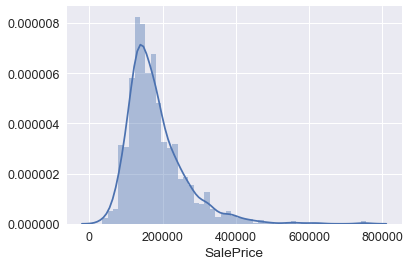

In [40]:
sns.distplot(train['SalePrice']);


我們現在已經了解SalePrice的大概分布，再來要開始找與他正相關的參數，簡單來說就是要找哪些參數對他影響最大<br/>

80個參數放眼望去...GrLivArea(建築面積)看起來會是個好選擇，馬上試試

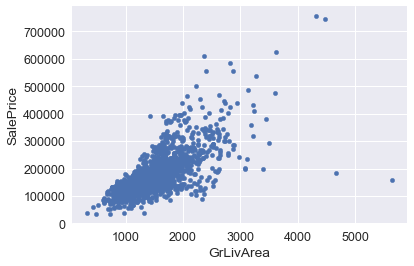

In [41]:
var = 'GrLivArea' 
data = pd.concat([train['SalePrice'], train[var]], axis=1) #讀取csv欄位值
data.plot.scatter(x=var, y='SalePrice');#設x y軸


我們可以看到他們兩個是完全正相關的，隨著建築面積提升房價也跟著提升，但還是有小例外，像右下角的兩個點

當然有可能因為他在超級郊區的地方，所以他地皮便宜，但這會影響我們這個參數整體的正相關性，所以還是會將其抹掉

再來比較'TotalBsmtSF'(地下室總面積)

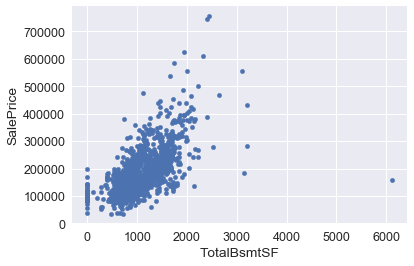

In [42]:
var = 'TotalBsmtSF' 
data = pd.concat([train['SalePrice'], train[var]], axis=1) #讀取csv欄位值
data.plot.scatter(x=var, y='SalePrice');#設x y軸


恩恩也是正相關的（・w・）~~ 不過最右邊那點是怎麼回事?是地下倉庫嗎?沒關西沒關西等等也把你抹殺掉 ψ(ˋ∇´)ψ

當然還有很明顯的參數值，像'OverallCond'(房屋整體狀況)，順便示範圖表的重要性


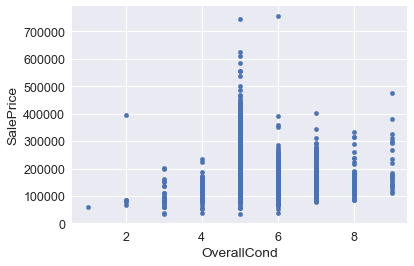

In [43]:
var = 'OverallCond' 
data = pd.concat([train['SalePrice'], train[var]], axis=1) #讀取csv欄位值
data.plot.scatter(x=var, y='SalePrice');#設x y軸


這是什麼根本看不出有沒有相關性啊!!所以選則圖形表達是一件很重要的是!!


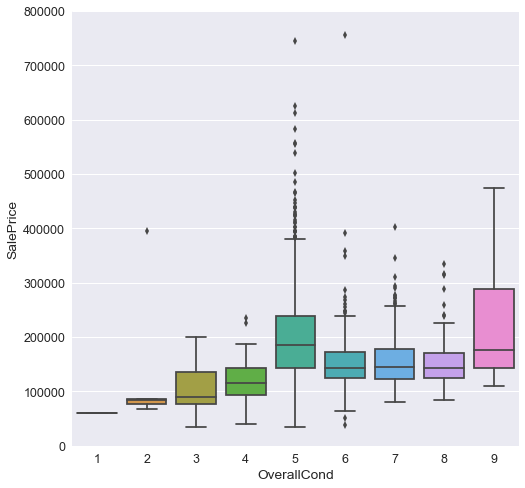

In [44]:
var = 'OverallCond'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);#定上限


果然有range的就是要用盒鬚圖才好呈現，資料視覺化也是一門學問

從盒鬚圖中看得出來整體評價跟房價是有正相關的，但沒那麼明顯那我們再看看'OverallQual'(房屋用料與完工情形)

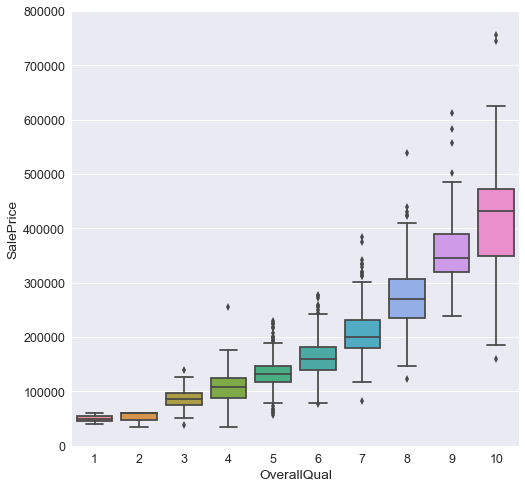

In [45]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);


WOW!!!看來OverallQual與房價是超級正相關呢!!ʘ ͜ʖ ʘ

當然還有很多很多的參數需要分析，我在kaggle看到了一個快速評估的方式'Correlation matrix'
<br/>
'Correlation matrix'真的可以快速分析參數，以下就來演示這厲害的東西~~

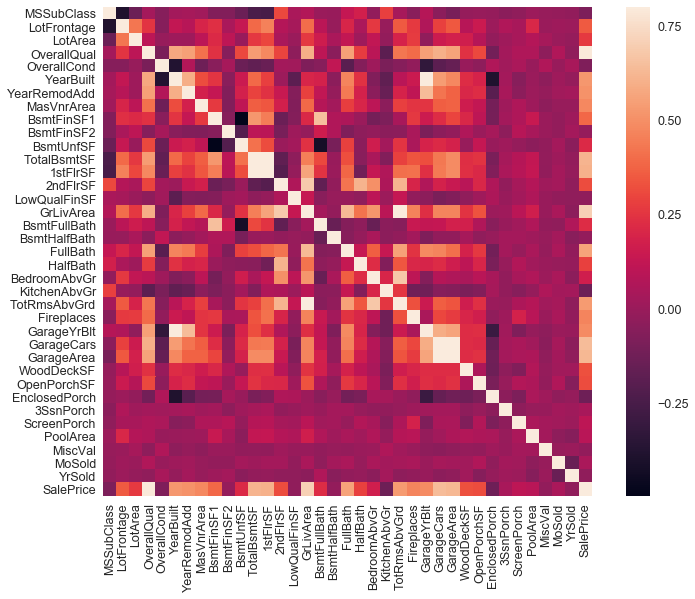

In [46]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


    在這矩陣熱圖中可以看到各個參數的正相關，但能抓出來的都是數字型態的，不過其他的先做one hot也可以拿來用

圖中看到許多參數交集為白點，即表示那兩個參數就是超級正相關的，也就是說兩個參數是能合在一起的，

例如:YearBuilt(建物年分)與GarageYrBit(車庫年分)，兩個參數根本是一樣的，應該很少房子主屋跟車庫分開建的吧!!
    
還有像GarageCars(能停放的車輛數)跟GarageArea(車庫空間)，這也是一樣的，車庫越大越能停越多車。
    
這矩陣也直接提供了SalePrice與其他參數的訊息，看向SalePrice果然看到剛剛正相關的OverallQual是白的!!
    
所以這些與SalePrice相關性高的參數就是我們將要選出來做訓練預測的參數!!我好興奮啊終於要做訓練了!!
    
還沒呢!!要做的事情還很多(´；ω；｀)...


原作者還多寫了一個從上面矩陣抓出相關性高參數的，在做一個矩陣，更好判斷，真的很細心


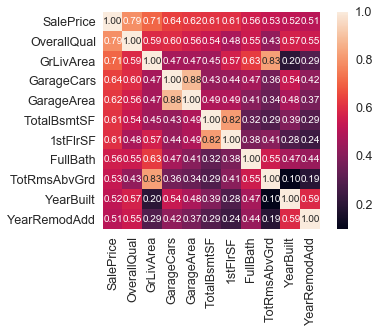

In [47]:
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


做成這張圖後我蠻意外的，屋齡居然是波士頓人比較不在意的，倒是車庫空間跟地下室空間他們很在意，我整個問號??

他們是有多少台車要停，地下室又到底要多大??


接下來做成相關各參數之間的散點圖，來看看大家的離散程度以及較明顯的線性


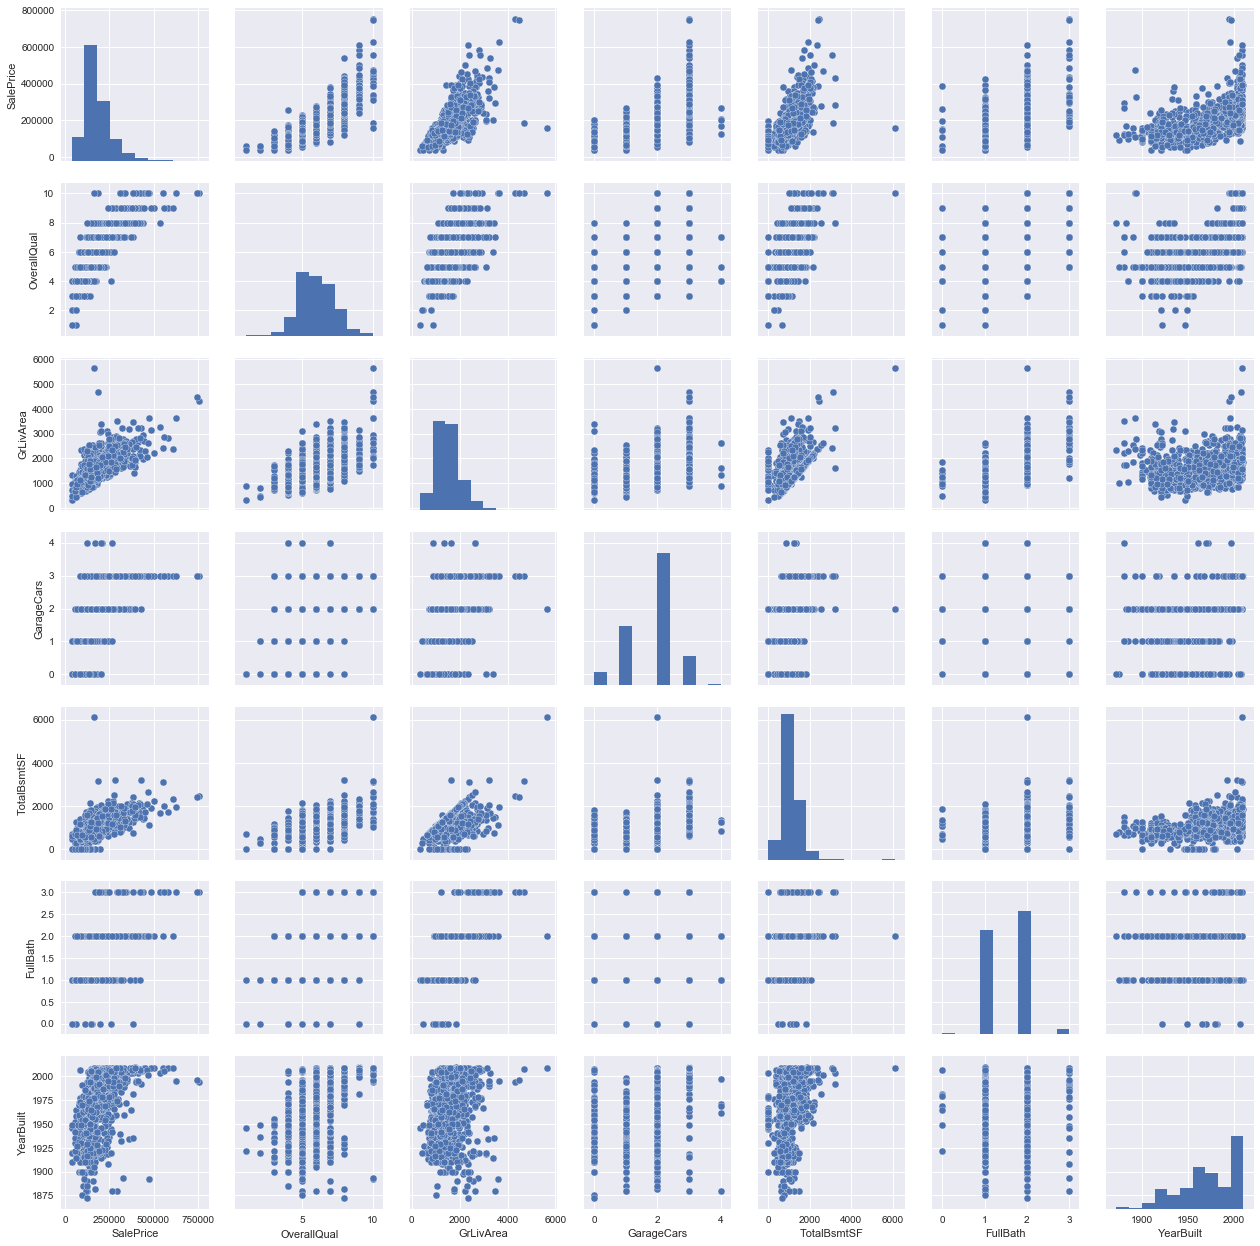

In [48]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();


這邊蠻有趣的，可以看到建物面積跟地下室面積也是完全正相關，這很好理解

我看到年分跟地下室面積時發現越新的房子地下室面積會大些，現代人對地下室面積有一定的需求，還蠻奇妙的!!

# 關於資料缺失


這裡要來處理資料缺失的問題，在資料庫中往往會有loss掉的Data，雖然一般情況會被loss掉的也是不重要的

但為了小心起見我們還是要做些處理，先將有欄位缺失的參數列出來~

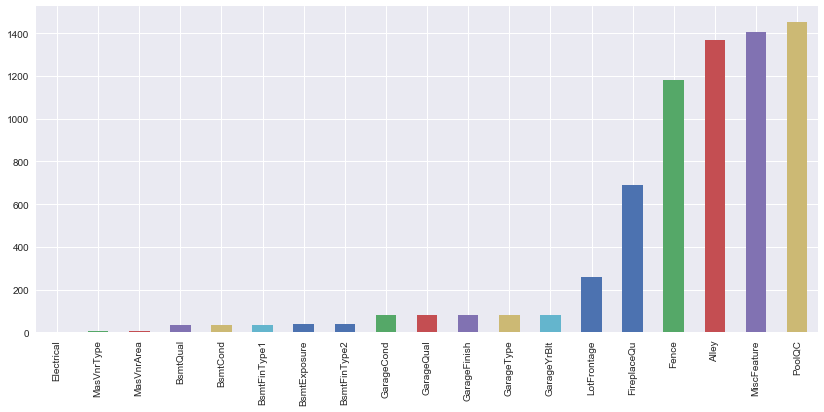

In [49]:
_, axes = plt.subplots(figsize=(14, 6))
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()


有些數據真的丟失的太嚴重，所以乾脆將其丟棄，但還是有很多要注意的地方


In [50]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479



  在刪除缺失值之前先明白缺失的是什麼，我本來也是打算直接刪掉有缺失值的，但在kernel上看到別人的另類的解法

我覺得他們方法好太多了，可以避免刪掉重要的參數

In [51]:
categorical_features = train.select_dtypes(include='object').columns
train[categorical_features] = train[categorical_features].fillna('None')
test[categorical_features] = test[categorical_features].fillna('None') #輸入分類功能

In [52]:
from sklearn.preprocessing import Imputer

train_dp = train.drop(columns='SalePrice')
#將NaN替換為相應的鄰域中位數
train_dp["LotFrontage"] = train_dp.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
    
# 將NaN替換為特徵中位數 
numerical_features = train_dp.select_dtypes(include='number').columns
my_imputer = Imputer()
train_dp[numerical_features] = my_imputer.fit_transform(train_dp[numerical_features])
test[numerical_features] = my_imputer.transform(test[numerical_features])

In [53]:
idx_split = train_dp.shape[0]
df_train = train_dp.append(test)#設test and train

In [54]:
NumStr = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr","KitchenAbvGr","MoSold","YrSold","YearBuilt","YearRemodAdd","LowQualFinSF","GarageYrBlt"]
for col in NumStr:
    df_train[col]=df_train[col].astype(str)
    
non_ordinal_features = ['LandSlope','Utilities','MSZoning', 'Street','Alley','LotShape','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle', 'RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrType','Foundation', 'BsmtExposure','BsmtFinType1','BsmtFinType2', 'Heating', 'CentralAir', 'Electrical','Functional', 'GarageType','GarageFinish','PavedDrive', 'Fence','MiscFeature','SaleType','SaleCondition', "MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr","KitchenAbvGr","MoSold","YrSold","YearBuilt","YearRemodAdd","LowQualFinSF","GarageYrBlt"]
ordinal_features = df_train.select_dtypes(include='object').columns.drop(non_ordinal_features)

In [55]:
dummies = pd.get_dummies(df_train.loc[:,non_ordinal_features], drop_first=True)
df_train = pd.concat([df_train,dummies], axis=1)
df_train = df_train.drop(non_ordinal_features,axis=1)

In [56]:
def cat_to_num(x):
    if x=='Ex':
        return 5
    if x=='Gd':
        return 4
    if x=='TA':
        return 3
    if x=='Fa':
        return 2
    if x=='Po':
        return 1
    if x=='None':
        return 0

df_train.loc[:,ordinal_features] = df_train.loc[:,ordinal_features].applymap(cat_to_num)

In [57]:
X = df_train.loc[:idx_split, :]
X_test = df_train.loc[idx_split+1:, :]#分成訓練跟驗證

In [58]:
X = X.assign(SalePrice=y_train)#先將房價加入標籤中方便等等預測


終於要開始訓練啦!!!!前面分析過的血漿圖可以拿出來用了!!

就是這張~~

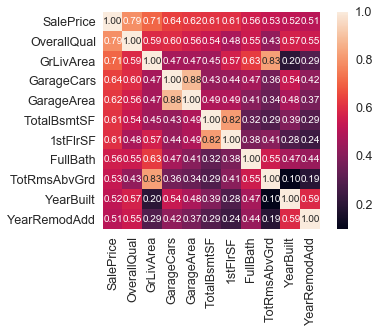

In [59]:
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [60]:
X = X.drop(columns='SalePrice')  #分割目標，因為我們不希望在建模時將目標作為預測器。

In [61]:
X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
X["TotalHouse_OverallQual"] = X["TotalHouse"] * X["OverallQual"]
X["GrLivArea_OverallQual"] = X["GrLivArea"] * X["OverallQual"]


X_test["TotalHouse"] = X_test["TotalBsmtSF"] + X_test["1stFlrSF"] + X_test["2ndFlrSF"]   
X_test["TotalHouse_OverallQual"] = X_test["TotalHouse"] * X_test["OverallQual"]
X_test["GrLivArea_OverallQual"] = X_test["GrLivArea"] * X_test["OverallQual"]

#這邊是將特徵做結合，依據上面做資料探勘的圖可以找出相似的線性關係，所以將他們做結合

# 數據清理

就是前面講的將異質點抹殺掉，像'GrLivArea'散點圖中最右下角兩個突兀的點必須死!!!


In [62]:
print(X[(X['GrLivArea']>4000) & (y_train<300000)].index)
X = X.drop(X[(X['GrLivArea']>4000) & (y_train<300000)].index)
y_train = y_train.drop([524, 1299])  #清掉這個參數偏質過大的點

Int64Index([524, 1299], dtype='int64', name='Id')


# 特徵規範化

In [63]:
numeric_feats = X.dtypes[X.dtypes != "object"].index
numeric_feats = numeric_feats.drop(dummies)
numeric_feats = numeric_feats.drop(ordinal_features)

skewed_feats = X[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness = skewness[abs(skewness) > 0.75]

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    X[feat] = boxcox1p(X[feat], lam)
    X_test[feat] = boxcox1p(X_test[feat], lam)

In [64]:
y_train = np.log(y_train)

##  避免多重共線性

In [65]:
multicol_features = ['GarageCars', 'PoolQC', 'FireplaceQu', 'GarageCond']
X = X.drop(multicol_features, axis = 1)
X_test = X_test.drop(multicol_features, axis = 1)

##  用MinMaxScaler實現特徵縮放

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X)

X[X.columns] = scaler.transform(X[X.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

# 3 依照資料特性選合適的模型
kernel中大量的文章已經告訴我們使用Lasso回歸是最好的選擇，並以xgboost當分類器。

LASSO回歸的特點是在擬合廣義線性模型的同時進行變量篩選(Variable Selection)和復雜度調整(Regularization)。 

因此，不論目標因變量(dependent/response varaible)是連續的(continuous)，還是二元或者多元離散的(discrete)， 都可以用LASSO回歸建模然后預測。 這里的變量篩選是指不把所有的變量都放入模型中進行擬合，而是有選擇的把變量放入模型從而得到更好的性能參數，這對我們來說是一個很好的選擇。

再來在模型上我們選擇kaggle最多人使用的神器!!!!xgboos!!!!!

<a href="https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC5-2%E8%AC%9B-kaggle%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E7%AB%B6%E8%B3%BD%E7%A5%9E%E5%99%A8xgboost%E4%BB%8B%E7%B4%B9-1c8f55cffcc">關於xgboost</a>

在上面文章中有xgboost的介紹及用法，在他底下連結還有更多不錯的相關資訊，我從裡面獲益良多，大家可以參考參考

# 4 調整參數
在調整參數上kerenl作者使用了sklearn的GridSearchCV，GridSearchCV對調參數沒想法的人就是奇蹟般的存在。

GridSearchCV就是用貪婪演算法來找出最佳參數，省時省力啊，但還是有小缺點的。

GridSearchCV會依照影響模型最大的參數來把他調優，但這就可能壤結果只達到局部最優類似過擬合的狀況。

所以GridSearchCV不是萬能的，在小的數據集中他的確100分，但在大的數據集裡他可就沒那麼厲害了。


In [67]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor #kaggle王者
from sklearn.model_selection import GridSearchCV #參數神器
from sklearn.metrics import mean_squared_log_error

rgr_ls = Lasso(fit_intercept = True)
param_grid = {
    "alpha": [0.0002, 0.0003, 0.0005, 0.0008, 0.001]
}
searchCV = GridSearchCV(rgr_ls, cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
searchCV.fit(X, y_train)
np.sqrt(searchCV.best_score_*-1)

0.11746835128312841

Text(0.5,1,'Coefficients with magnitude greater than 0.03')

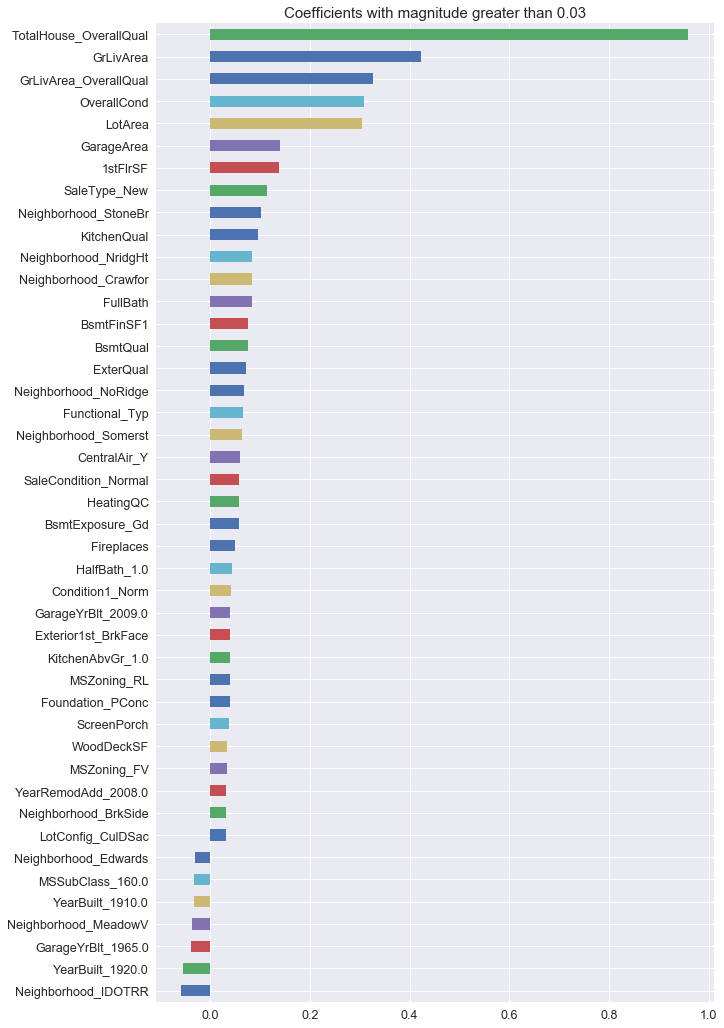

In [68]:
lasso = searchCV.best_estimator_
coefs = pd.Series(lasso.coef_,index=X.columns)

plt.figure(figsize=(10,18))
coefs[coefs.abs()>0.03].sort_values().plot.barh()
plt.title('Coefficients with magnitude greater than 0.03') #照參數分析

# 5 結果的呈現
我們這邊當然是依照kaggle的規則來生成csv

In [69]:
y_test_pred = searchCV.predict(X_test)
y_test_pred = np.exp(y_test_pred)
my_submission = pd.DataFrame({'Id': X_test.index.astype(int), 'SalePrice': y_test_pred})
my_submission.to_csv('submission.csv', index=False)

# Kaggle排名

![Image of Yaktocat](./result/123.PNG)

![Image of Yaktocat](./result/321.PNG)

當然還有其他kernel可以參考來提升排名，但我認為這兩位作者的作品對新手來說是最好了解的

# 參考資料
- https://www.kaggle.com/felgueira/top-20-interpretable-solution-using-lasso
- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python